<a href="https://colab.research.google.com/github/jorgelizarazo94/Learning/blob/main/Actividad_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis general de la avifauna en Corazón


Esta actividad tiene como finalidad compilar y utilizar un flujo de trabajo inicial en el análisis exploratorio de datos. También es esta un ejercicio perteneciente a la materia con el mismo nombre se crea con el objetivo de ser evaluada y corregida por el correspondiente tutor. 

## Origen de los datos



Se llevaron a cabo una serie de monitoreos de aves y murciélagos utilizando redes de niebla con el objetivo de mejorar el conocimiento ambiental y la biodiversidad del Parque Ambiental Corazón de Pance y áreas del SIMAP en el Distrito de Santiago de Cali (DAGMA e Icesi; No. 4133.010.27.1.043-2022). Este convenio también incluye estudios sobre la biodiversidad del Ecoparque Cerro La Bandera y la Reserva Municipal de Uso Sostenible Río Meléndez - RMUS. En este informe, se presentarán datos exclusivamente sobre la avifauna en un período de tres meses para el area de estudio Corazón de pance, lo que permitirá tener una comprensión más profunda de la composición y abundancia de las especies de aves presentes en las áreas monitoreadas. Estos datos son fundamentales para la conservación y manejo adecuado de estos ecosistemas, ya que las aves son indicadores clave de la salud y la diversidad de los ecosistemas.

Nuestro objetivo en la región o área de estudio de Corazón de Pance es entender el uso de coberturas vegetales por parte de la avifauna. Esto quiere decir cuales áreas poseen mayor diversidad y abundancia de especies y como es el movimiento entre estas coberutras. En el área se identificarón tres coberturas, zona de potrero, restauración y bosque. Donde la zona de potrero, se consigno como la zona con mayor predominancia de gramíneas (Poaceae) y pocos árboles, dispuestos de forma dispersa; Restauración, predio sembrado o restaurado de forma activa con presencia predominante de Vainillo (Senna spectabilis); y finalmente Bosque, zona más conservada en términos de bosque nativo, con presencia predominante de fustes altos y cobertura de dosel mayor al 30%.

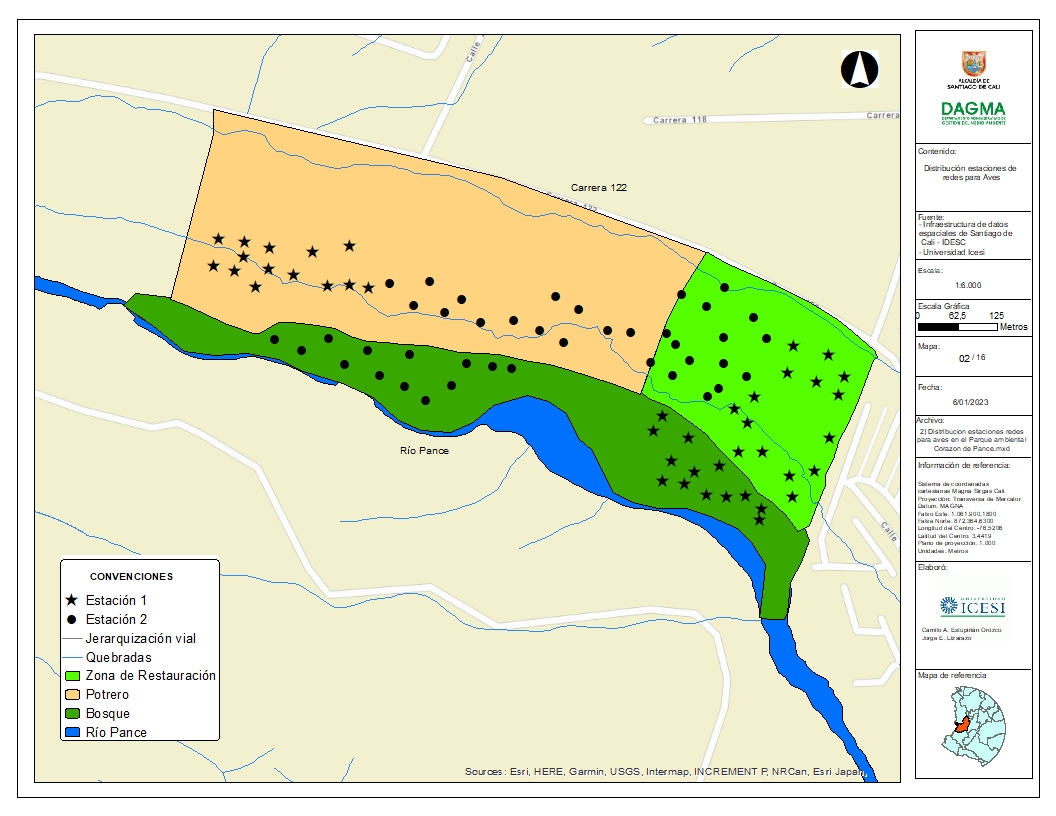

En el mapa se muestran el conjunto de estaciones donde se colocaron redes de niebla para la captura y medición de aves al interior de la zona de estudio.

## Procesamiento de datos

Primero cargamos los paquetes y herramientas necesarias para nuestro análisis exploratorio de la avifauna en el área de estudio.

In [18]:
from google.colab import drive #### Abrir dataset desde mi drive
import pandas as pd  ####  Manipulacion y exploracion de datos
import numpy as np #### funciones matematicas
import xarray as xr  #### Manipulacion de dataset




from sklearn.preprocessing import OneHotEncoder #### realizar One hot encoding

######################################################## Import data from 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Aves en el Parque Corazón de Pance

Nuestro dataset o dataframe consta de datos sobre cada registro, estos van desde el numero de la estación y red de niebla, la hora de la captura, la especie, coordenadas planas de la red, etc. 

In [19]:

bird = pd.read_csv('/content/drive/MyDrive/intento/Datos_aves_(1).csv', sep=',')

bird.head(5)


,order,locality,Station,day,time,species,Net#,Latitude,Longitude,Gremio
0,cap_1,restauracion,1,9/22/2022,7:40,milvago_chimachima,Red_9,3.344095174,-76.55235951,Carnivoro
1,cap_2,restauracion,1,9/22/2022,8:20,amazilia_tzacatl,Red_8,3.344512761,-76.55223316,Nectarivoro
2,cap_3,restauracion,1,9/22/2022,8:50,turdus_ignobilis,Red_7,3.344715553,-76.55241358,Omnivoro
3,cap_4,restauracion,1,9/22/2022,8:50,turdus_ignobilis,Red_7,3.344715553,-76.55241358,Omnivoro
4,cap_5,restauracion,1,9/22/2022,9:20,stilpnia_vitriolina,Red_1,3.345617065,-76.55158278,Frugivoro


In [20]:
bird.tail(5)

,order,locality,Station,day,time,species,Net#,Latitude,Longitude,Gremio
212,cap_213,restauracion,2,12/4/2022,8:20,anthracothorax_nigricollis,Red_6,3.345729405,-76.55258004,Nectarivoro
213,cap_214,restauracion,2,12/4/2022,9:30,tyrannus_melancholicus,Red_2,3.345633741,-76.5532659,Insectivoro
214,cap_215,restauracion,2,12/4/2022,9:30,piaya_cayana,Red_3,3.345782021,-76.55339485,Insectivoro
215,cap_216,restauracion,2,12/4/2022,9:30,melanerpes_rubricapillus,Red_6,3.345729405,-76.55258004,Insectivoro
216,cap_217,restauracion,2,12/4/2022,9:30,amazilia_tzacatl,Red_9,3.346445752,-76.55255519,Nectarivoro


Tenemos 

**En total tenemos 10 columnas** 

In [21]:
list(bird.columns)

['order',
 'locality',
 'Station',
 'day',
 'time',
 'species',
 'Net#',
 'Latitude',
 'Longitude',
 'Gremio']

Ahora queremos ver el número de información perdida o no disponible dentro de nuestra matriz.

In [22]:
bird.isna().sum()

order         0
locality      0
Station       0
day           0
time          0
species       0
Net#         19
Latitude      0
Longitude     0
Gremio        1
dtype: int64

Durante el análisis de los datos, se identificaron 19 valores NaN en el número asignado a la red y un único valor NaN en el campo de Gremio, correspondiente a una especie o individuo. Tras revisar los metadatos y consultar con el equipo de aves, se descubrió que el número de red no fue asignado para algunos registros debido a que no proporcionaba información adicional, ya que existía un nombre de estación (Station) que proporcionaba la misma información. Sin embargo, se detectó un error en el campo de Gremio que no fue corregido. Dado que solo se trata de un valor erróneo, se decidió eliminarlo ya que no afectará a nuestro análisis exploratorio.

In [23]:
bird = bird.dropna(subset = ["Gremio"])
bird
bird.isna().sum()

order         0
locality      0
Station       0
day           0
time          0
species       0
Net#         19
Latitude      0
Longitude     0
Gremio        0
dtype: int64

Ahora nos queda encontrar el tipo de información que nos suministra cada columna.

In [24]:
bird.dtypes

order        object
locality     object
Station       int64
day          object
time         object
species      object
Net#         object
Latitude     object
Longitude    object
Gremio       object
dtype: object

### Número de especies por cobertura

Ahora deseamos encontrar a grandes rasgos la información de las especies por cobertura vegetal.

In [25]:
diver_cob = bird.groupby('locality')['species'].count().reset_index()
diver_cob

,locality,species
0,bosque,63
1,potrero,48
2,restauracion,105


Como vemos la cobertura que posee mayor número de especies es la de restauración seguida de bosques y finalmente potrero. En el proceso podemos a su vez identificar los gremios con mayor número de especies...

In [26]:
gremio1 = bird.groupby('Gremio')['species'].count().reset_index()
gremio1

,Gremio,species
0,Carnivoro,3
1,Frugivoro,56
2,Granivoro,26
3,Insectivoro,76
4,Nectarivoro,27
5,Omnivoro,28


Como podemos ver los insectivoros ocuparon mayor diversidad de especies.

### Preparación de datos para futuros procesos por machine learning 

En el futuro necesitaremos procesar estos datos para su análisis por medio de modelos de inteligencia artificial. dado a esto podemos crear una forma de convertir datos categóricos en datos numéricos. Primero definimos como datos categóricos aquellos datos que se desean transformar, en nuestro caso "locality" o cobertura vegetal.

In [41]:
df = bird
df['locality'] = pd.Categorical(df['locality'], categories=['bosque', 'restauracion', 'potrero'], ordered=True)
df['locality'] = df['locality'].astype(str)
df

,order,locality,Station,day,time,species,Net#,Latitude,Longitude,Gremio
0,cap_1,restauracion,1,9/22/2022,7:40,milvago_chimachima,Red_9,3.344095174,-76.55235951,Carnivoro
1,cap_2,restauracion,1,9/22/2022,8:20,amazilia_tzacatl,Red_8,3.344512761,-76.55223316,Nectarivoro
2,cap_3,restauracion,1,9/22/2022,8:50,turdus_ignobilis,Red_7,3.344715553,-76.55241358,Omnivoro
3,cap_4,restauracion,1,9/22/2022,8:50,turdus_ignobilis,Red_7,3.344715553,-76.55241358,Omnivoro
4,cap_5,restauracion,1,9/22/2022,9:20,stilpnia_vitriolina,Red_1,3.345617065,-76.55158278,Frugivoro
...,...,...,...,...,...,...,...,...,...,...
212,cap_213,restauracion,2,12/4/2022,8:20,anthracothorax_nigricollis,Red_6,3.345729405,-76.55258004,Nectarivoro
213,cap_214,restauracion,2,12/4/2022,9:30,tyrannus_melancholicus,Red_2,3.345633741,-76.5532659,Insectivoro
214,cap_215,restauracion,2,12/4/2022,9:30,piaya_cayana,Red_3,3.345782021,-76.55339485,Insectivoro
215,cap_216,restauracion,2,12/4/2022,9:30,melanerpes_rubricapillus,Red_6,3.345729405,-76.55258004,Insectivoro


El metodo que usaremos se llama *One Hot Encoder* y utiliza de la siguiente manera:

1. Aplicacion para datos de cobertura vegetal "locality"

In [42]:
encoder = OneHotEncoder() ###### creacion del objeto

X = encoder.fit_transform(df.locality.values.reshape(-1,1)).toarray() ##3transformacion previa y conversion a version array
df2 = pd.DataFrame(X) ### reconversion a dataset o dataframe
df2.columns= ['bosque', 'restauracion', 'potrero']
df2

,bosque,restauracion,potrero
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
211,0.0,0.0,1.0
212,0.0,0.0,1.0
213,0.0,0.0,1.0
214,0.0,0.0,1.0


2. Aplicacion para datos de gremio "Gremio"

**nota:** el siguiente codigo es para ver todos lo gremios y poder mas adelante crear una dataset con los nombres similares.

In [30]:
df['Gremio'].unique()

array(['Carnivoro', 'Nectarivoro', 'Omnivoro', 'Frugivoro', 'Granivoro',
       'Insectivoro'], dtype=object)

In [31]:
Y = encoder.fit_transform(df.Gremio.values.reshape(-1,1)).toarray()
df3 = pd.DataFrame(Y)
df3.columns= ['Carnivoro', 'Nectarivoro', 'Omnivoro', 'Frugivoro', 'Granivoro',
       'Insectivoro']
df3

,Carnivoro,Nectarivoro,Omnivoro,Frugivoro,Granivoro,Insectivoro
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
211,0.0,0.0,0.0,0.0,1.0,0.0
212,0.0,0.0,0.0,1.0,0.0,0.0
213,0.0,0.0,0.0,1.0,0.0,0.0
214,0.0,0.0,0.0,1.0,0.0,0.0


Ya teniendo ambos dataset con los datos cobertidos en sentido *One Hot Encoder* debemos unirlas ambas a la matriz con los demas datos. 

In [43]:
df4 = df2.join(df3, how='outer')
dff = df.join(df4, how= 'outer').drop(columns= ['Gremio', 'locality'])


,order,Station,day,time,species,Net#,Latitude,Longitude,bosque,restauracion,potrero,Carnivoro,Nectarivoro,Omnivoro,Frugivoro,Granivoro,Insectivoro
0,cap_1,1.0,9/22/2022,7:40,milvago_chimachima,Red_9,3.344095174,-76.55235951,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,cap_2,1.0,9/22/2022,8:20,amazilia_tzacatl,Red_8,3.344512761,-76.55223316,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,cap_3,1.0,9/22/2022,8:50,turdus_ignobilis,Red_7,3.344715553,-76.55241358,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,cap_4,1.0,9/22/2022,8:50,turdus_ignobilis,Red_7,3.344715553,-76.55241358,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,cap_5,1.0,9/22/2022,9:20,stilpnia_vitriolina,Red_1,3.345617065,-76.55158278,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
5,cap_6,1.0,9/22/2022,9:50,anthracothorax_nigricollis,Red_4,3.345176531,-76.5508456,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,cap_7,1.0,9/22/2022,9:50,sicalis_flaveola,Red_8,3.344512761,-76.55223316,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7,cap_8,1.0,9/22/2022,9:50,ramphocelus_dimidiatus,Red_4,3.345176531,-76.5508456,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
8,cap_9,1.0,9/22/2022,9:50,forpus_conspicillatus,Red_5,3.345229251,-76.55166503,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
9,cap_10,1.0,9/22/2022,9:50,myiozetetes_cayanensis,Red_3,3.345102536,-76.55124184,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


Finalmente tenemos nuestra dataframe final con ambos "locality" y "gremios" transformados para su posterior procesamiento en modelos de inteligencia artificial. 

In [44]:

dff.head(12)

,order,Station,day,time,species,Net#,Latitude,Longitude,bosque,restauracion,potrero,Carnivoro,Nectarivoro,Omnivoro,Frugivoro,Granivoro,Insectivoro
0,cap_1,1.0,9/22/2022,7:40,milvago_chimachima,Red_9,3.344095174,-76.55235951,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,cap_2,1.0,9/22/2022,8:20,amazilia_tzacatl,Red_8,3.344512761,-76.55223316,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,cap_3,1.0,9/22/2022,8:50,turdus_ignobilis,Red_7,3.344715553,-76.55241358,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,cap_4,1.0,9/22/2022,8:50,turdus_ignobilis,Red_7,3.344715553,-76.55241358,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,cap_5,1.0,9/22/2022,9:20,stilpnia_vitriolina,Red_1,3.345617065,-76.55158278,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
5,cap_6,1.0,9/22/2022,9:50,anthracothorax_nigricollis,Red_4,3.345176531,-76.5508456,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,cap_7,1.0,9/22/2022,9:50,sicalis_flaveola,Red_8,3.344512761,-76.55223316,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7,cap_8,1.0,9/22/2022,9:50,ramphocelus_dimidiatus,Red_4,3.345176531,-76.5508456,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
8,cap_9,1.0,9/22/2022,9:50,forpus_conspicillatus,Red_5,3.345229251,-76.55166503,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
9,cap_10,1.0,9/22/2022,9:50,myiozetetes_cayanensis,Red_3,3.345102536,-76.55124184,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


### Número de individuos por especie por cobertura 

Ahora queremos analizar solo un poco más sobre la superficie de los datos. Vamos a ver cuántas especies e individuos hay por tipo de cobertura vegetal en el área de estudio.

Creamos primero una nueva dataset con los valores de individuos por especie en cada una de las coberturas. 

In [59]:
locality_order = ['bosque', 'restauracion', 'potrero']

# Convert the 'locality' column to an ordered categorical data type
df['locality'] = pd.Categorical(df['locality'], categories=locality_order, ordered=True)

# Use pivot_table() to create a wide-format dataframe with species counts by locality
df_wide = pd.pivot_table(df, index='species', columns='locality', aggfunc='size')


df_wide

locality,bosque,restauracion,potrero
species,,,
amazilia_tzacatl,2,7,6
anthracothorax_nigricollis,0,2,1
camptostoma_obsoletum,0,3,0
cardellina_canadensis,1,0,0
catharus_ustulatus,5,2,1
...,...,...,...
turdus_ignobilis,8,7,9
tyrannus_melancholicus,0,11,0
volatinia_jacarina,2,0,0


Ahora retiramos las subcolumnas y volvemos a una estructura de dataset mas conveniente:

In [67]:
df_wide = df_wide.reset_index()

# Rename the columns
df_wide.columns = ['species', 'bosque', 'restauracion', 'potrero']

Quedaria entonces de la siguiente manera.

In [68]:
df_wide

,species,bosque,restauracion,potrero
0,amazilia_tzacatl,2,7,6
1,anthracothorax_nigricollis,0,2,1
2,camptostoma_obsoletum,0,3,0
3,cardellina_canadensis,1,0,0
4,catharus_ustulatus,5,2,1
...,...,...,...,...
58,turdus_ignobilis,8,7,9
59,tyrannus_melancholicus,0,11,0
60,volatinia_jacarina,2,0,0
61,zenaida_auriculata,0,2,0


Ahora deseamos saber cuáles fueron las especies con mayor abundancia, es decir cuales especies presentaron mayor número de individuos en cada cobertura.

In [69]:
abund = pd.DataFrame(df_wide).set_index('species')

# Get the species with the highest abundance in each column
most_abundant = abund.idxmax()
abundance_counts = abund.max()
result = pd.concat([most_abundant, abundance_counts], axis=1)
result.columns = ['Más abundante', 'Conteo']

print(result)

                       Más abundante  Conteo
bosque        ramphocelus_dimidiatus      10
restauracion  tyrannus_melancholicus      11
potrero             turdus_ignobilis       9


También es necesario una revisión o descripción general de todos los datos.

In [70]:
df_wide.describe()

,bosque,restauracion,potrero
count,63.000000,63.000000,63.000000
mean,1.000000,1.666667,0.761905
std,1.857852,2.228843,1.691671
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000
75%,1.000000,2.000000,1.000000
max,10.000000,11.000000,9.000000


Según esta descripción la cobertura con mayor número de individuos es en restauración con un promedio por especie de 1.6 ± 2.2 ind. 

**Grafiquemos**


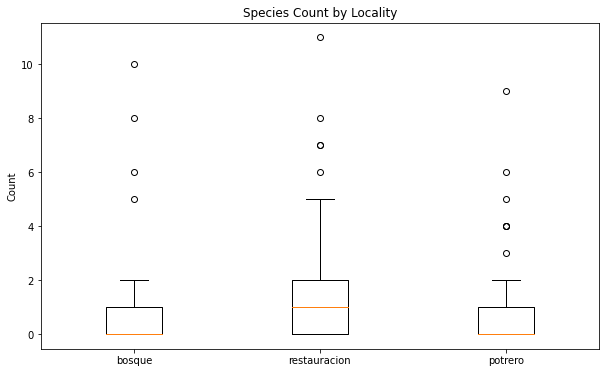

In [71]:
import matplotlib.pyplot as plt


# Melt dataframe to create a 'long' format
df_melt = pd.melt(df_wide, id_vars=['species'], var_name='locality', value_name='count')

# Create boxplot
plt.figure(figsize=(10, 6))
plt.boxplot([df_melt[df_melt['locality'] == 'bosque']['count'], 
             df_melt[df_melt['locality'] == 'restauracion']['count'], 
             df_melt[df_melt['locality'] == 'potrero']['count']])
plt.xticks([1, 2, 3], ['bosque', 'restauracion', 'potrero'])
plt.ylabel('Count')
plt.title('Species Count by Locality')
plt.show()

vemos en el boxplot que en caso que hiciéramos alguna prueba estadística podríamos posiblemente encontrar que la zona de restauración posee mayor número de individuos por especies que las otras dos coberturas. esto teniendo en cuenta que es el área con menor diversidad de especies.

#### Intercambio de especies entre coberturas

Solo en forma general deseamos visualizar cual es el recambio de especies por cobertura. de esta forma entender cuántas especies pueden estar compartiéndose entre las coberturas. definimos hacer la siguiente gráfica:

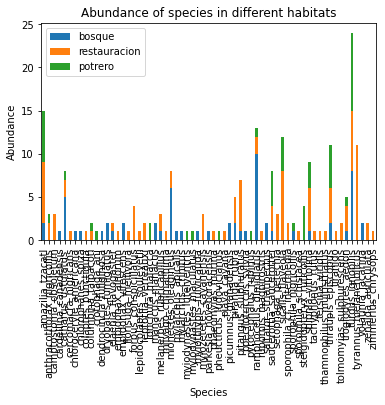

In [72]:
# set the species column as the index of the dataframe
df_wide.set_index('species', inplace=True)

# create a stacked bar chart of the data
ax = df_wide.plot(kind='bar', stacked=True)

# set the title and axis labels
ax.set_title('Abundance of species in different habitats')
ax.set_xlabel('Species')
ax.set_ylabel('Abundance')

# show the plot
plt.show()


In [53]:
#from google.colab import files
#df_wide.to_csv("datos_birds.csv", index=False)
#files.download("datos_br.csv")